# Obtain data via ztfquery, as an example of ZTF19abqwtfu

In [2]:
from sdapy import ztfanalysis, models, functions
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False
import numpy as np

### download data

In [2]:
# initialize class
ztfp = ztfanalysis.ztfsingle(ztfid='ZTF19abqwtfu', iauid='SN2019odp', 
        ra='23:07:19.09', dec='+13:51:21.5', z=0.014353, dm=33.92,
        mkwebv=0.532/3.1, sntype='SN Ic-BL')

In [3]:
ztfp.config_ztfquery(wdir='/Users/yash0613/Desktop/scripts/sn_data_analysis/sdapy/')

In [4]:
ztfp.query_alert_ztf(source='fritz')

In [17]:
ztfp.query_fp_atlas(wdir='/Users/yash0613/Desktop/scripts/sn_data_analysis/sdapy/', 
            clobber=False, verbose=True, mjdstart=58500, mjdend=59250)

23:07:19.09 use unit hourangle
Your token is beb9fc87868968ddf2703246684ce0c78f13d1ff
Store this by running/adding to your .zshrc file:
export ATLASFORCED_SECRET_KEY="beb9fc87868968ddf2703246684ce0c78f13d1ff"
The task URL is https://fallingstar-data.com/forcedphot/queue/203807/
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start (queued at 2022-05-19T09:16:07Z)
Waiting for job to start 

ConnectionError: HTTPSConnectionPool(host='fallingstar-data.com', port=443): Max retries exceeded with url: /forcedphot/queue/203807/ (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f98755ff898>: Failed to establish a new connection: [Errno 60] Operation timed out',))

In [22]:
ztfp.query_fp_ztf(query=False, wdir='/Users/yash0613/Desktop/scripts/sn_data_analysis/sdapy/', 
            clobber=False, verbose=True, jdstart=2458500, jdend=2459250)

23:07:19.09 use unit hourangle
ZTF19abqwtfu 346.82954166666667 13.855972222222222 2458500.0 2459250.0 wget --http-user=ztffps --http-passwd=dontgocrazy! -q -O log.txt "https://ztfweb.ipac.caltech.edu/cgi-bin/requestForcedPhotometry.cgi?ra=346.8295417&dec=13.8559722&jdstart=2458500.00000&jdend=2459250.00000&email=sheng.yang@astro.su.se&userpass=augj975"


### run

reload from /Users/yash0613/Library/CloudStorage/Box-Box/ztf_data/tmp//fit1_ZTF19abqwtfu_r_trf.npz
reload from /Users/yash0613/Library/CloudStorage/Box-Box/ztf_data/tmp//fit1_ZTF19abqwtfu_g_trf.npz
reload from /Users/yash0613/Library/CloudStorage/Box-Box/ztf_data/tmp//fit1_ZTF19abqwtfu_i_trf.npz
define template g-r at 10 rest frame days post peak, otherwise assume no host ebv
reload from /Users/yash0613/Library/CloudStorage/Box-Box/ztf_data/tmp//Arnett1_ZTF19abqwtfu_mcmc_3.npz


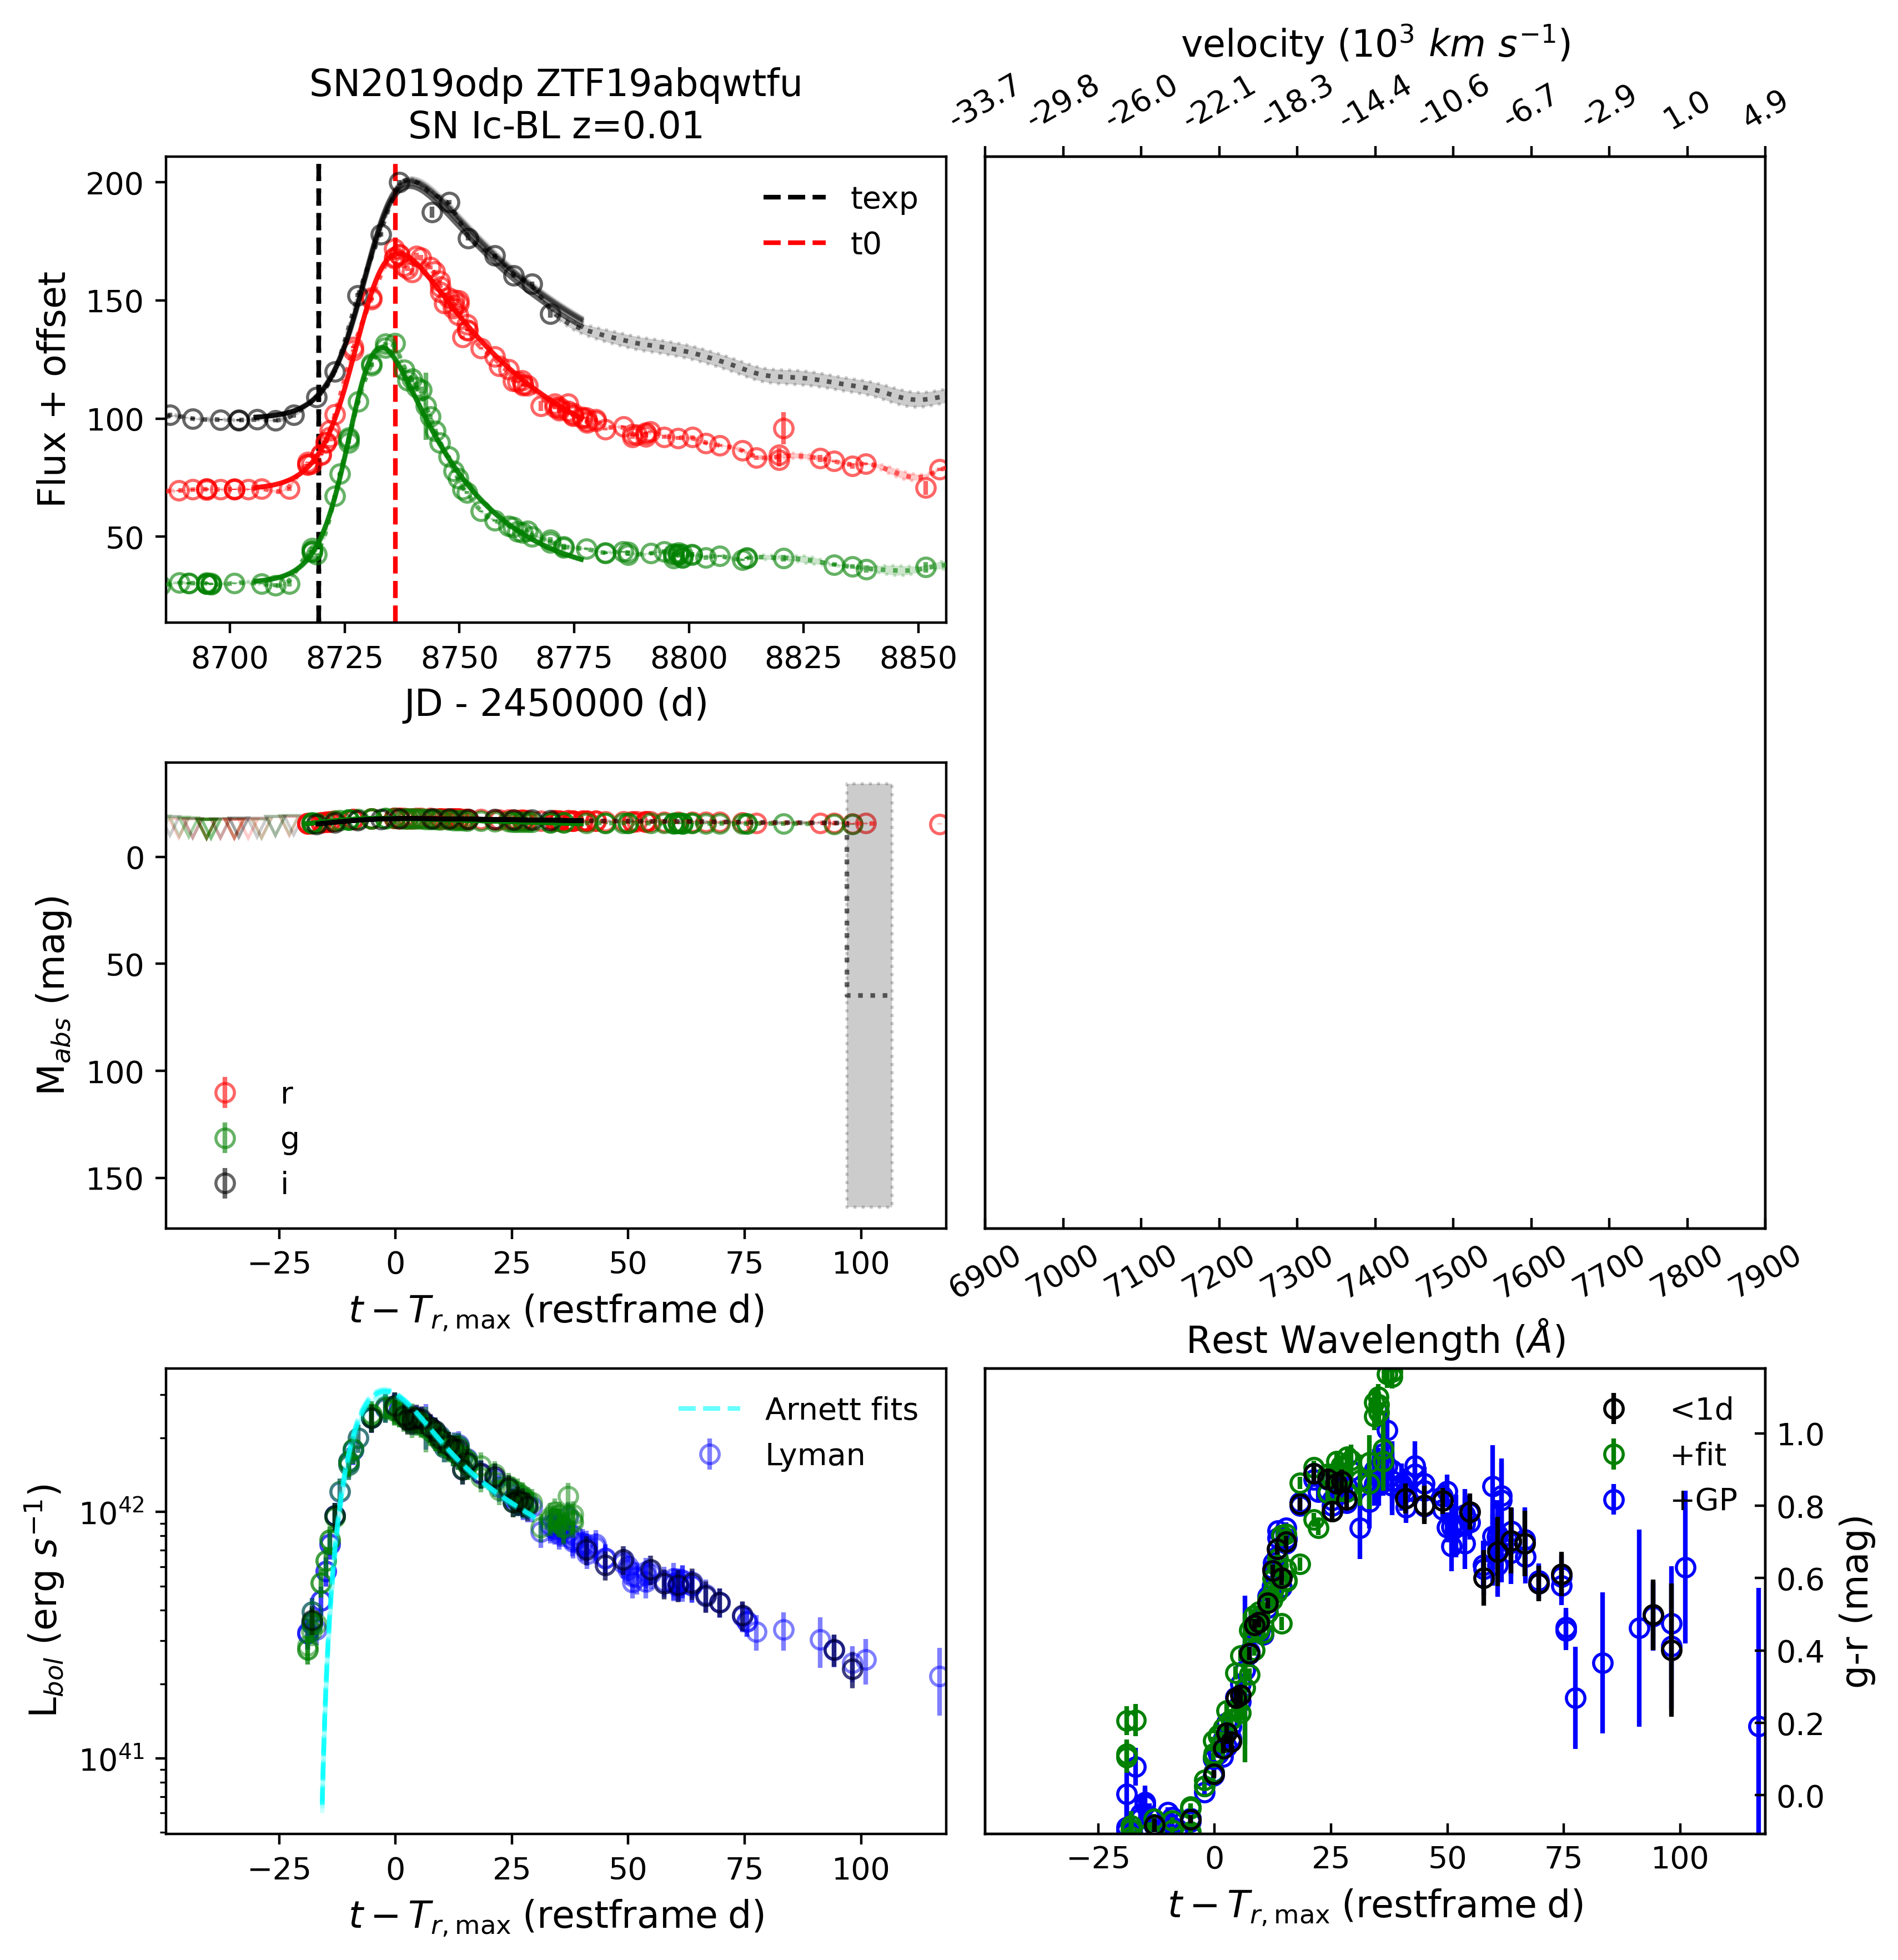

In [6]:
par = {
    'nwalkers':50,
    'plot_bands': ['r','g','c','o','i'],
    'gp_type':1,
    'gp_bands': ['r','g','c','o','i'],
    'pl_type':0,
    'fit_type':1,
    'fit_bands': ['r','g','c','o','i'],
    'fit_routine':'trf',
    'nsteps': 20000,
    'nsteps_burnin': 5000,
    'verbose': True,
    'ax_xlim': [-50,120],
    'bolopt': [1,],
    'lyman_copt': [1,2,3],
    'copt': [1,2,3],
    'Arnett_type':1,
    'Arnett_routine':'mcmc',
    'Arnett_fitr': [-25,30],
    'Arnett_plotr': [-25,30],
    'Arnett_copt': [1,2,3],
    'Arnett_bolopt': 1,
    'Arnett_style': 3,
    'Tail_type':0,
    'Tail_style':1,
    'Tail_fitr':[30,120],
    'Tail_plotr':[30,120],
    'Tail_copt': [1,2,3],
    'Tail_routine':'mcmc',
    'Tail_bolopt': 1,
    'joint_type':0,
    'joint_style':2,
    'joint_copt': [1,2,3],
    'joint_bolopt': 1,
    'joint_routine':'mcmc', 
    'spec_source': ['TNS'],
    'spec_fitr'    : [20000, 26000],
    'spec_plotr'   : [20000, 26000],
    'spec_type'    : 1,
    'tm_pl'       : 50,
    'fix_scale':  False
}

ztfp = ztfanalysis.ztfsingle(ztfid='ZTF19abqwtfu', iauid='SN2019odp', 
        ra='23:07:19.09', dec='+13:51:21.5', z=0.014353, dm=33.92,
        mkwebv=0.532/3.1, sntype='SN Ic-BL', **par)
#ztfp.get_alert_ztf(source='fritz')
#ztfp.get_fp_atlas(binDays=1, clobber=False)
ztfp.get_fp_ztf()
ztfp.on_sntype() # check sn type   
ztfp.run_gp()     # Gaussian process
ztfp.set_t0_withgp() 
ztfp.set_texp_midway()
ztfp.run_fit()

if False:
    fig,ax=plt.subplots(1,1)
    ztfp.calibrate_baseline(ax=ax, key='fcqfid', source='ztffp',
                    xmin=-100, xmax=-20, ax_xlim=None, ax_ylim=None)
else:
    ztfp.init_fig()
    ztfp.calc_colors()
    ztfp.est_host_c10() 
    ztfp.lyman_bol()
    #ztfp.get_local_spectra() 
    #ztfp.meas_specline()
    ztfp.arnett_fit()
    ztfp.tail_fit() 
    #ztfp.joint_fit()
    ztfp.plot() 

In [41]:
from scipy.integrate import simps
import math
class constants:
    # covert things to cgs units
    M_sun=1.989e33
    R_sun=696340e5
    c=3.e10
    tau_Ni=8.8
    tau_Co=111.3
    e_Ni=3.9e10
    e_Co=6.8e9
    k_opt=0.07 # k_opt=0.07 g/cm^2, fixed optical opacity (corresponds to electron scattering) for SE SNe
    C=.05
    k_gamma = 0.027
    beta=13.8  # beta=13.8, constant of integration (Arnett 1982)
    gamma=6./5.
def dessart_vej_to_vm(vpeak, vpeake, sntype, verbose):
    if sntype in ['SN Ib', 'SN IIb']:
        vm, dvm = (vpeak-2.64) / 0.765, vpeake / 0.765
    elif sntype in ['SN Ic', 'SN Ic-BL']:
        vm, dvm = (vpeak-2.99) / 0.443, vpeake / 0.443
    else:
        if verbose: print ('check if Dessart et al suitable for your sn type')
        vm, dvm = None, None
    return vm, dvm
def Arnett_fit_taum(times, m_ni, tau_m):
    mni = m_ni * constants.M_sun
    t = times * 86400.    
    t = np.array([t]) if (isinstance(t, np.float64) or isinstance(t, float)) else t    
    tau_Ni = constants.tau_Ni * 86400.
    tau_Co = constants.tau_Co * 86400    
    tau_m  *= 86400.
    int_A=np.zeros(len(t)) 
    int_B=np.zeros(len(t)) 
    L_ph=np.zeros(len(t))
    
    x = t/tau_m
    y = tau_m/(2.*tau_Ni)
    s = tau_m*(tau_Co-tau_Ni)/(2.*tau_Co*tau_Ni)
    
    for i in range(len(t)):
        z  = np.arange(100)*x[i]/100.
        Az = 2.*z*np.exp(-2.*z*y+np.square(z))
        Bz = 2.*z*np.exp(-2.*z*y+2.*z*s+np.square(z))
        int_A[i] = simps(Az,z)
        int_B[i] = simps(Bz,z)
        _L_ph = (mni*np.exp(-1.*np.square(x[i])))*((constants.e_Ni-constants.e_Co)*int_A[i]+constants.e_Co*int_B[i])
        if math.isnan(_L_ph): continue
        L_ph[i]=_L_ph
    return L_ph
def tail_fit_t0(t, mni, t0):
    t = np.array([t]) if (isinstance(t, np.float64) or isinstance(t, float)) else t    
    decay_factor = 1-np.e**(-(t0/t)**2)
    tau_Ni = constants.tau_Ni
    tau_Co = constants.tau_Co
    Lgamma = mni*( 6.45*np.e**(-t/tau_Ni) + 1.38*np.e**(-t/tau_Co) )
    Lpos = 4.64*mni*( -np.e**(-t/tau_Ni) + np.e**(-t/tau_Co) )    
    return Lgamma * decay_factor *1e43 + Lpos * 1e41
def taum_to_Mej_Ek(taum, vej, taumerr=None, vejerr=None):
    vej *= 1e8 # to cgs units
    if vejerr is not None: vejerr *= 1e8    
    taum *= 86400.
    if taumerr is not None: taumerr *= 86400.
    
    Mej = vej*taum**2*constants.beta*constants.c/constants.k_opt/(2.*constants.gamma)**(.5)
    Ek = vej**3*taum**2*constants.beta*constants.c/constants.k_opt/(8.*constants.gamma)**(.5)
    if taumerr is None or vejerr is None: return Mej/constants.M_sun, Ek/1e51
    
    # error
    M_ejE_K = taum/((constants.k_opt/(constants.beta*constants.c))**0.5)*(constants.gamma**(0.25))
    M_ejE_KE = taumerr/((constants.k_opt/(constants.beta*constants.c))**0.5)*(constants.gamma**(0.25))
    Mejerr = Mej*((2*M_ejE_KE/M_ejE_K)**2 + (vejerr/vej)**2)**0.5
    Ekerr = Ek*((2*vejerr/vej)**2 + (Mejerr/Mej)**2)**0.5    
    return Mej/constants.M_sun, Mejerr/constants.M_sun, Ek/1e51, Ekerr/1e51
def t0_to_Mej_Ek(t0, vej, t0err=None, vejerr=None):
    vej *= 1e8
    if vejerr is not None: vejerr *= 1e8    
    t0 *= 86400.
    if t0err is not None: t0err *= 86400.

    Mej = 0.5*vej**2*t0**2/constants.C/constants.k_gamma
    Ekin = 0.25*vej**4*t0**2/constants.C/constants.k_gamma    
    if t0err is None or vejerr is None: return Mej/constants.M_sun, Ekin/1e51
    
    # error    
    Mejerr = Mej*((2*t0err/t0)**2 + (2*vejerr/vej)**2)**0.5
    Ekerr = Ekin*((2*t0err/t0)**2 + (4*vejerr/vej)**2)**0.5    
    return Mej/constants.M_sun, Mejerr/constants.M_sun, Ekin/1e51, Ekerr/1e51
def Mej_Ek_to_vej(Mej, Ek):
    Mej *= constants.M_sun
    Ek *= 1e51
    vej = np.sqrt(2*Ek/Mej)         
    return vej * 1e-8
def Mej_Ek_to_t0(Mej, Ek, k_gamma=constants.k_gamma):
    _Mej = Mej*constants.M_sun
    _Ek = Ek*1e51
    t0 = np.sqrt(constants.C*k_gamma*_Mej**2/_Ek)
    return t0 / 86400.
def Mej_Ek_to_taum(Mej, Ek, k_opt=constants.k_opt):   
    M_ejE_K = ( (Mej*constants.M_sun)**3 / (Ek*1e51) )**(1./4.)
    taum = M_ejE_K * ((k_opt/(constants.beta*constants.c))**0.5)*(constants.gamma**(0.25))           
    return taum / 86400.
def joint_fit_Mej_Ek(times, mni, Mej, Ek, ts):
    t0 = Mej_Ek_to_t0(Mej, Ek)
    taum = Mej_Ek_to_taum(Mej, Ek)
    t = times
    L1 = Arnett_fit_taum(t, mni, taum)
    L2 = tail_fit_t0(t, mni, t0)
    Ls = np.zeros(len(t))
    ix1 = times < ts
    Ls[ix1] = L1[ix1]
    Ls[~ix1] = L2[~ix1]
    return Ls
def joint_fit_Mej_vej(times, mni, Mej, vej=10.912, ts=70):
    Ek = (vej * 1e8)**2 * (Mej*constants.M_sun) / 2 / 1e51
    t0 = Mej_Ek_to_t0(Mej, Ek, constants.k_gamma)
    taum = Mej_Ek_to_taum(Mej, Ek, 0.1)
    t = times
    L1 = Arnett_fit_taum(t, mni, taum)
    L2 = tail_fit_t0(t, mni, t0)
    Ls = np.zeros(len(t))
    ix1 = times < ts
    Ls[ix1] = L1[ix1]
    Ls[~ix1] = L2[~ix1]
    return Ls
def Mej_Ek_to_vej(Mej, Ek):
    Mej *= constants.M_sun
    Ek *= 1e51
    vej = np.sqrt(2*Ek/Mej)         
    return vej * 1e-8
#Mej_Ek_to_vej(5.9,6.8)
#Mej_Ek_to_t0(5.85,6.8)
#Mej_Ek_to_taum(5.9,6.8)
#Mej_Ek_to_vej(28.16,32.74)
#Mej_Ek_to_t0(29,33)

No handles with labels found to put in legend.


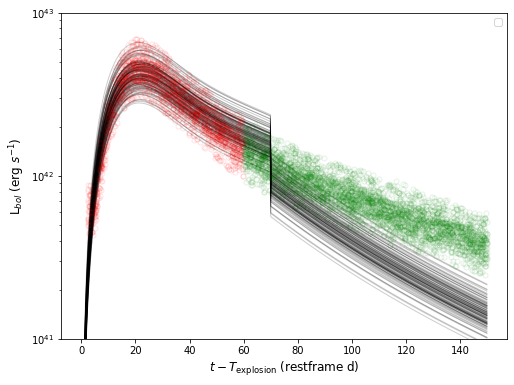

In [42]:
from scipy.optimize import curve_fit
import glob, corner
filelist = glob.glob('/Users/yash0613/Desktop/singleobj_study/sn2019odp/*.txt')
t0 = 58714
vpeak = 10.912
vm=vpeak
xarnett = [0,60]
xtail = [60,150]
xpred_arnett = np.arange(xarnett[0], xarnett[1], .1)
xpred_tail = np.arange(xtail[0], xtail[1], .1)
xpred = np.arange(0, 150, .1)

fig, ax = plt.subplots(1,1)
xl = []
for n, f in enumerate(filelist):
    #print (n, len(filelist))
    #if n>-1:continue
    x, y = [], []
    x1, y1 = [], []
    x2, y2 = [], []
    for l in open(f).readlines():
        if l[0] == '#':continue
        mjd, mbol, lum = l.split()
        if float(mjd) - t0 >= xarnett[0] and float(mjd) - t0 <= xarnett[1]:
            x1.append(float(mjd) - t0)
            y1.append(float(lum))
        if float(mjd) - t0 >= xtail[0] and float(mjd) - t0 <= xtail[1]:
            x2.append(float(mjd) - t0)
            y2.append(float(lum))
        x.append(float(mjd) - t0)
        y.append(float(lum))
    ax.plot(x1,y1,color='r',marker='o',ls='',alpha=.1,fillstyle='none',markersize=5) 
    ax.plot(x2,y2,color='g',marker='o',ls='',alpha=.1,fillstyle='none',markersize=5) 
    if False: # arnett fit
        popt,pcov = curve_fit(Arnett_fit_taum,x1,y1,p0=(.2,10),
            bounds=([1e-3,0],[5.,100]),maxfev=20000)
        perr = np.sqrt(np.diag(pcov))    
        yfit1 = Arnett_fit_taum(xpred_arnett, *popt) 
        ax.plot(xpred_arnett, yfit1, color='k', ls='-', lw=1, alpha=.1)    
        mni1, taum = popt    
        Mej1, Ek1 = taum_to_Mej_Ek(taum, vm, taumerr=None, vejerr=None)
    if False: # tail fit
        popt,pcov = curve_fit(tail_fit_t0,x2,y2,p0=(.2,60),
            bounds=([0,0],[1,1000]),maxfev=20000)
        perr = np.sqrt(np.diag(pcov))    
        yfit2 = tail_fit_t0(xpred_tail, *popt) 
        ax.plot(xpred_tail, yfit2, color='k', ls='-', lw=1, alpha=.1)    
        mni2, t_0 = popt    
        Mej2, Ek2 = t0_to_Mej_Ek(t_0, vm)
    if False: # joint fit
        popt,pcov = curve_fit(joint_fit_Mej_Ek,x,y,p0=(.2,5,5,70),
            bounds=([0,0,0,20],[1,100,100,100]),maxfev=20000)
        perr = np.sqrt(np.diag(pcov))    
        yfit3 = joint_fit_Mej_Ek(xpred, *popt) 
        ax.plot(xpred, yfit3, color='k', ls='-', lw=1, alpha=.2)    
        mni, Mej, Ek, ts = popt
    if True: # joint fit
        popt,pcov = curve_fit(joint_fit_Mej_vej,x,y,p0=(.2,5),
            bounds=([0,0],[1,100]),maxfev=20000)
        perr = np.sqrt(np.diag(pcov))    
        yfit3 = joint_fit_Mej_vej(xpred, *popt) 
        ax.plot(xpred, yfit3, color='k', ls='-', lw=1, alpha=.2)    
        mni, Mej = popt
    #joint_fit_Mej_vej(times, mni, Mej, vej, ts):
    #xl.append([mni1,Mej1,Ek1,mni2,Mej2,Ek2])
    xl.append([mni, Mej])
if False:
    '''
    taum = Mej_Ek_to_taum(5.85,6.8)
    print(taum)
    yfit1 = Arnett_fit_taum(xpred_arnett, .26, taum) 
    ax.plot(xpred_arnett, yfit1, color='orange', ls='-', lw=3, alpha=1, 
        label='M$_{Ni}$=0.26 M$_{\odot}$ M$_{ej}$=5.85 M$_{\odot}$ E$_{k}$=6.8 foe') 
    t0 = Mej_Ek_to_t0(28.16,32.74)
    yfit2 = tail_fit_t0(xpred_tail, .16, t0) 
    ax.plot(xpred_tail, yfit2, color='cyan', ls='-', lw=3, alpha=1,
        label='M$_{Ni}$=0.16 M$_{\odot}$ M$_{ej}$=28.16 M$_{\odot}$ E$_{k}$=32.74 foe') 
    
    taum = Mej_Ek_to_taum(3.18,1.19)
    print(taum)
    yfit1 = Arnett_fit_taum(xpred_arnett, .25, taum) 
    ax.plot(xpred_arnett, yfit1, color='r', ls='-', lw=3, alpha=1, 
        label='M$_{Ni}$=0.25 M$_{\odot}$ M$_{ej}$=3.18 M$_{\odot}$ E$_{k}$=1.19 foe') 
    t0 = Mej_Ek_to_t0(3.18,1.19)
    yfit2 = tail_fit_t0(xpred_tail, .25, t0) 
    ax.plot(xpred_tail, yfit2, color='g', ls='-', lw=3, alpha=1,
        label='M$_{Ni}$=0.25 M$_{\odot}$ M$_{ej}$=3.18 M$_{\odot}$ E$_{k}$=1.19 foe') 
    '''
    taum = Mej_Ek_to_taum(5.85,6.8)
    print(taum)
    yfit1 = Arnett_fit_taum(xpred_arnett, .26, taum) 
    ax.plot(xpred_arnett, yfit1, color='orange', ls='-', lw=3, alpha=1, 
        label='M$_{Ni}$=0.26 M$_{\odot}$ M$_{ej}$=5.85 M$_{\odot}$ E$_{k}$=6.8 foe') 
    t0 = Mej_Ek_to_t0(28.16,32.74)
    yfit2 = tail_fit_t0(xpred_tail, .16, t0) 
    ax.plot(xpred_tail, yfit2, color='cyan', ls='-', lw=3, alpha=1,
        label='M$_{Ni}$=0.16 M$_{\odot}$ M$_{ej}$=28.16 M$_{\odot}$ E$_{k}$=32.74 foe') 
    
ax.set_yscale('log')
ax.set_ylim([1e41,1e43])
ax.set_xlabel('$t - T_{\mathrm{explosion}} \; (\mathrm{restframe \; d})$',fontsize=12)
ax.set_ylabel('L$_{bol}$ (erg $s^{-1}$)',fontsize=12)    
ax.legend()
fig.set_size_inches(8,6)
plt.show()

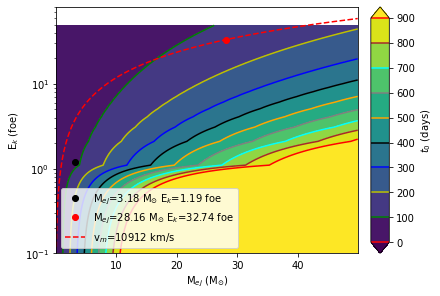

In [275]:
xs = np.arange(.1,50,.1)
ys = np.arange(.1,50,1)
x, y = np.meshgrid(xs, ys)
z = Mej_Ek_to_t0(x, y)
levels = np.arange(0,1000,100)

fig, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(x, y, z, levels, extend='both')
CS2 = ax.contour(CS, levels, colors=['r','g','y','b','k','orange','grey','cyan','brown'], origin='lower')

ax.set_xlabel('M$_{ej}$ (M$_{\odot}$)')
ax.set_ylabel('E$_{k}$ (foe)')

ax.plot(3.18,1.19,'ko',label='M$_{ej}$=3.18 M$_{\odot}$ E$_{k}$=1.19 foe') 
ax.plot(28.16,32.74,'ro',label='M$_{ej}$=28.16 M$_{\odot}$ E$_{k}$=32.74 foe') 
Ek = (10.912 * 1e8)**2 * xs / 2. * constants.M_sun * 1e-51
ax.plot(xs, Ek, 'r--', label='v$_{m}$=10912 km/s')

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel(r'$t_0$ (days)')
cbar.add_lines(CS2)
ax.set_yscale('log')
ax.legend()

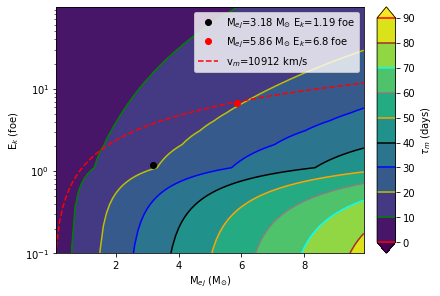

In [245]:
xs = np.arange(.1,10,.1)
ys = np.arange(.1,100,1)
x, y = np.meshgrid(xs, ys)
z = Mej_Ek_to_taum(x, y)

levels = np.arange(0,100,10)

fig, ax = plt.subplots(constrained_layout=True)
CS = ax.contourf(x, y, z, levels, extend='both')
CS2 = ax.contour(CS, levels, colors=['r','g','y','b','k','orange','grey','cyan','brown'], origin='lower')

ax.set_xlabel('M$_{ej}$ (M$_{\odot}$)')
ax.set_ylabel('E$_{k}$ (foe)')

ax.plot(3.18,1.19,'ko',label='M$_{ej}$=3.18 M$_{\odot}$ E$_{k}$=1.19 foe') 
ax.plot(5.85,6.8,'ro',label='M$_{ej}$=5.86 M$_{\odot}$ E$_{k}$=6.8 foe') 
Ek = (10.912 * 1e8)**2 * xs / 2. * constants.M_sun * 1e-51
ax.plot(xs, Ek, 'r--', label='v$_{m}$=10912 km/s')

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel(r'$\tau_m$ (days)')
cbar.add_lines(CS2)
ax.set_yscale('log')
ax.legend()

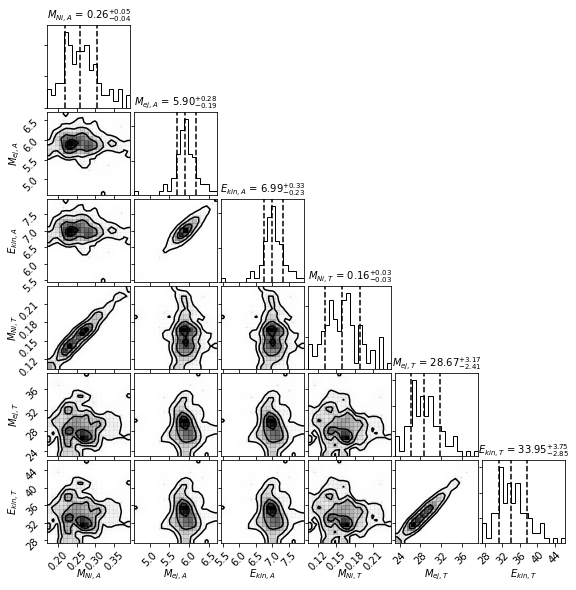

In [160]:
fig, axes = plt.subplots(6,6)
figure = corner.corner(xl,labels=[r"$M_{Ni,A}$", r"$M_{ej,A}$", r"$E_{kin,A}$",
                                  r"$M_{Ni,T}$", r"$M_{ej,T}$", r"$E_{kin,T}$",],
            quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 10}, fig=fig,
                      bins=20, smooth=1)
fig.set_size_inches(8,8)
plt.show()

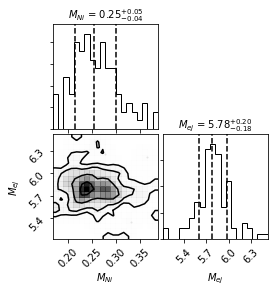

In [39]:
fig, axes = plt.subplots(2,2)
figure = corner.corner(xl,labels=[r"$M_{Ni}$", r"$M_{ej}$",],# r"$E_{kin}$"],
            quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 10}, fig=fig,
                      bins=20, smooth=1)
fig.set_size_inches(4,4)
plt.show()

In [9]:
ztfp.arnettcls.get_par()

([0.1308079899232103, 12.09914035542222, -16.861157141683908],
 [0.13290473669237196, 12.437744141627398, -16.77901805756504],
 [0.13520614734689604, 12.825142616694942, -16.606378596414306])

In [8]:
ztfp.corner(which='arnett_fit_taum_texp')

AssertionError: 